# HW3: Image filtering

Your assignment is to implement a method that will take an image and a filter and applies a [convolution](https://en.wikipedia.org/wiki/Kernel_(image_processing)) between them. Only 2D filters (of any dimension) will be used and the methods has to be able to handle both grayscale and RGB images. In case of RGB images, the filter is applied to each channel independently. When applying the filter, the pixels outside of the image boundary should be filled with zeros. You can assume that the kernels are square.

Only `numpy` and basic operations such as multiplication and sum can be used. So you cannot use `scipy`, for example.

In [419]:
from filtering.filtering import *
from filtering.helpers import *
import numpy as np

## RGB

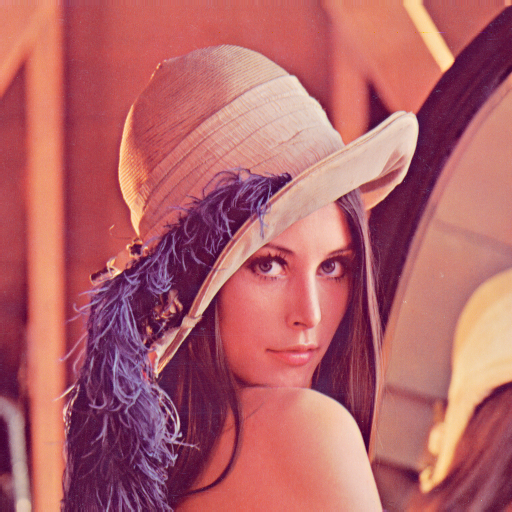

In [420]:
image = read_image('tests/lenna.png')
display_image(image)

In [489]:
""" Filtering function """
import numpy as np

def apply_filter(image: np.array, kernel: np.array) -> np.array:
    """ Apply given filter on image """
    # A given image has to have either 2 (grayscale) or 3 (RGB) dimensions
    assert image.ndim in [2, 3]
    # A given filter has to be 2 dimensional and square
    assert kernel.ndim == 2
    assert kernel.shape[0] == kernel.shape[1]
    newimage = np.zeros((image.shape[0], image.shape[1]), np.int8)
    if image.ndim == 3:
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                for c in range(image.ndim):
                    s = 0
                    for k1 in range(-(kernel.shape[0]//2), kernel.shape[1]//2 + 1):
                        for k2 in range(-(kernel.shape[0]//2), kernel.shape[1]//2 + 1):
                            # print(k1, k2)
                            if ((i+k1 < 0) or (j+k2 < 0) or (i+k1 >= image.shape[0]) or (j+k2 >= image.shape[1])):
                                s = s + 0
                            else:
                                s = s + (kernel[kernel.shape[0]//2+k1][kernel.shape[0]//2+k2] * image[i+k1][j+k2][c])
                    # print(s)
                    if s > 255:
                        newimage[i][j][c] = 255
                    elif s < 0:
                        newimage[i][j][c] = 0
                    else:
                        newimage[i][j][c] = s
    else:
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                s = 0
                for k1 in range(-(kernel.shape[0]//2), kernel.shape[1]//2 + 1):
                    for k2 in range(-(kernel.shape[0]//2), kernel.shape[1]//2 + 1):
                        # print(k1, k2)
                        if ((i+k1 < 0) or (j+k2 < 0) or (i+k1 >= image.shape[0]) or (j+k2 >= image.shape[1])):
                            s = s + 0
                        else:
                            s = s + (kernel[kernel.shape[0]//2+k1][kernel.shape[0]//2+k2] * image[i+k1][j+k2])
                # print(s)
                if s > 255:
                    newimage[i][j] = 255
                elif s < 0:
                    newimage[i][j] = 0
                else:
                    newimage[i][j] = s
    return newimage


In [490]:

roberts_cross_1_kernel = np.array([
    [1, 0],
    [0, -1],
])

roberts_cross_2_kernel = np.array([
    [0, 1],
    [-1, 0],
])
roberts_cross_4_kernel = np.array([
    [0, 0, 0, 1],
    [0, 0, -1, 0],
    [0, 1, 0, 0],
    [-1, 0, 0, 0],
])

display_image(apply_filter(image, roberts_cross_14_kernel))
display_image(apply_filter(image, roberts_cross_2_kernel))

[[226 226 223 223 226]
 [226 226 223 223 226]
 [226 226 223 223 226]
 [226 226 223 223 226]
 [226 226 223 223 226]]
[[137 137 137 136 138]
 [137 137 137 136 138]
 [137 137 137 136 138]
 [137 137 137 136 138]
 [137 137 137 136 138]]
[[125 125 133 128 120]
 [125 125 133 128 120]
 [125 125 133 128 120]
 [125 125 133 128 120]
 [125 125 133 128 120]]
[[226 223 223 226 226]
 [226 223 223 226 226]
 [226 223 223 226 226]
 [226 223 223 226 226]
 [226 223 223 226 226]]
[[137 137 136 138 129]
 [137 137 136 138 129]
 [137 137 136 138 129]
 [137 137 136 138 129]
 [137 137 136 138 129]]
[[125 133 128 120 116]
 [125 133 128 120 116]
 [125 133 128 120 116]
 [125 133 128 120 116]
 [125 133 128 120 116]]
[[223 223 226 226 228]
 [223 223 226 226 228]
 [223 223 226 226 228]
 [223 223 226 226 228]
 [223 223 226 226 228]]
[[137 136 138 129 138]
 [137 136 138 129 138]
 [137 136 138 129 138]
 [137 136 138 129 138]
 [137 136 138 129 138]]
[[133 128 120 116 123]
 [133 128 120 116 123]
 [133 128 120 116 123]
 [1

ValueError: operands could not be broadcast together with shapes (5,5) (5,4) 

In [424]:
# for filter_name, kernel in filters.items():
    # if filter_name !='Gaussian blur 5x5 (approx)':
    #     continue
    # print(filter_name)
    # display_image(apply_filter(image, kernel))
    # display_image(apply_filter(image, kernel))

Identity


KeyboardInterrupt: 

## Grayscale

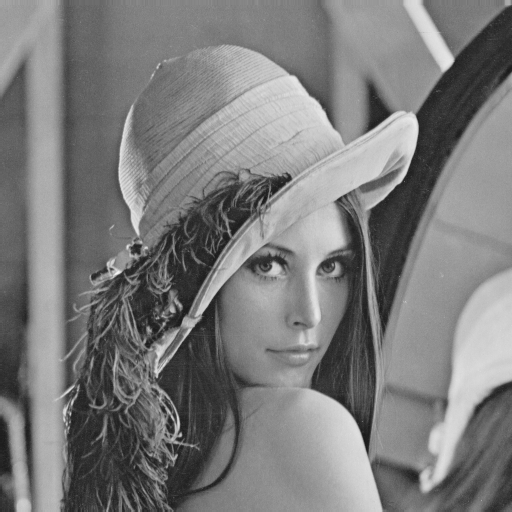

In [408]:
image_gray = np.average(image.astype(np.float64), weights=[0.299, 0.587, 0.114], axis=2).astype(np.uint8)
display_image(image_gray, 'L')

Identity


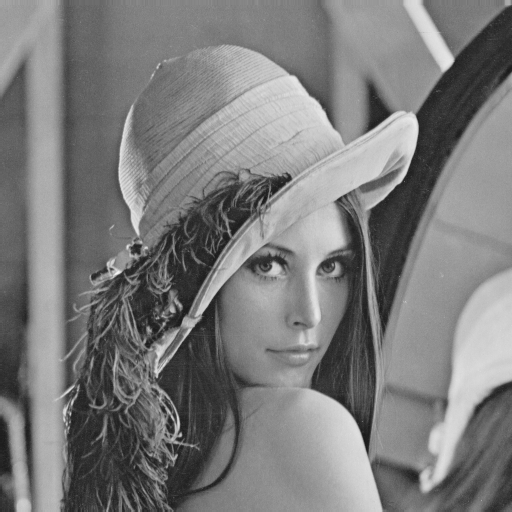

Sharpening


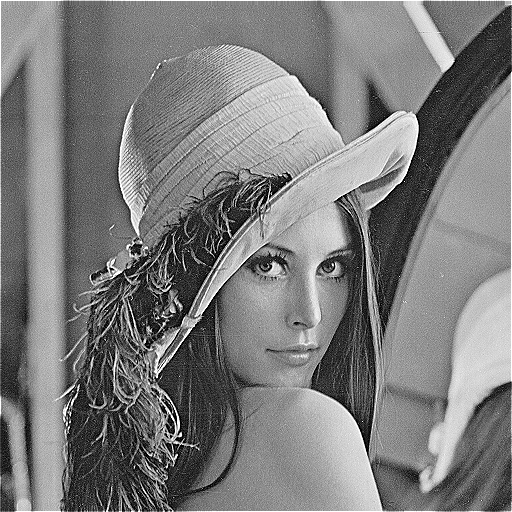

Gaussian blur 3x3 (approx)


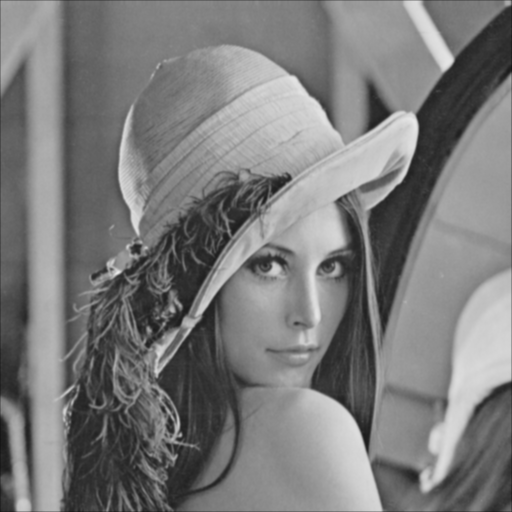

Gaussian blur 5x5 (approx)


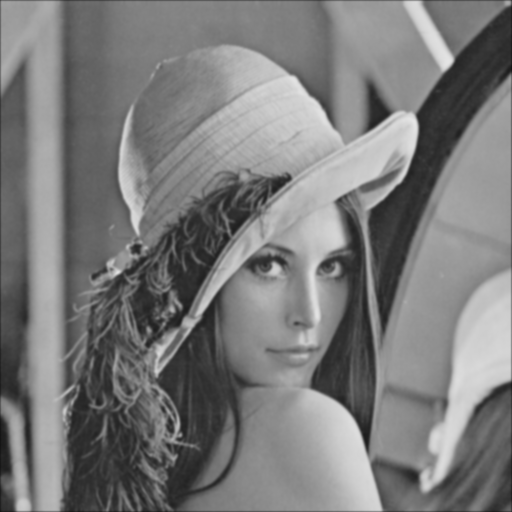

Edge detection


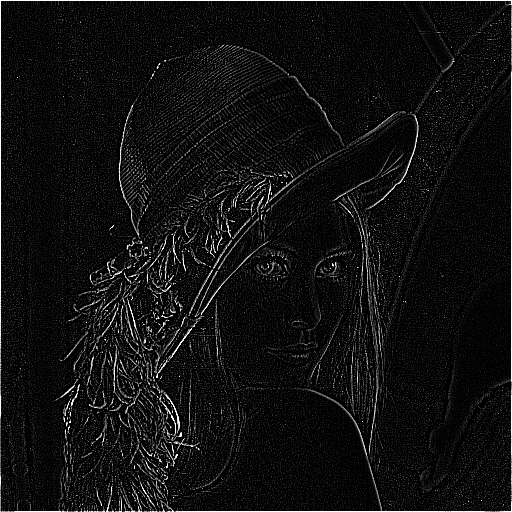

Embossing


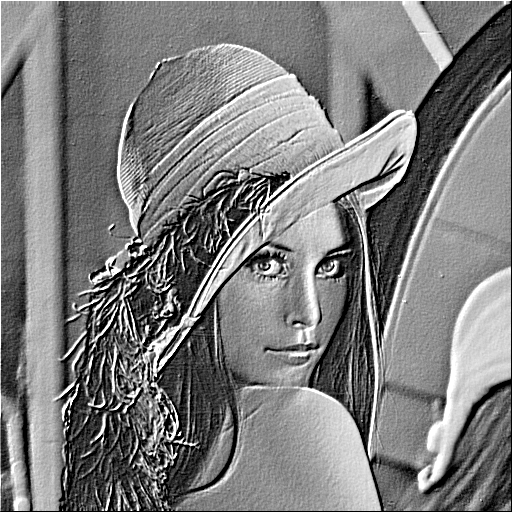

In [413]:
for filter_name, kernel in filters.items():
    print(filter_name)
    display_image(apply_filter(image_gray, kernel).astype(np.int8), 'L')

In [460]:
def fg(n):
    for i in range(n):
        yield lambda x: x+1
a=fg(2)
print(next(a)(5))
print(next(a)(4))
print(next(a)())

TypeError: 'function' object is not an iterator

2